In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
from sklearn import preprocessing as s_prep
from matplotlib.transforms import Affine2D

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
sns.set_style('darkgrid')

In [4]:
from project_methods import MSc_Proj as proj

In [5]:
file_loc = proj.show_saved_csv()
display(file_loc)

{'W:\\MSc-AIDS-UoH\\Trimester_3\\clean_pds\\': ['enrl_comb.csv',
  'enrl_nonph.csv',
  'enrl_nutsup.csv',
  'enrl_per_vis.csv',
  'enrl_pharm.csv',
  'enr_part_prof.csv',
  'only6_visits.csv']}

In [6]:
data_dir = [str(k) for k, v in file_loc.items()][0]
data_dir

'W:\\MSc-AIDS-UoH\\Trimester_3\\clean_pds\\'

## OVERALL OBSERVATIONS in enroll.csv

In [7]:
fname = 'enr_part_prof.csv'
main_df = pd.read_csv(data_dir+fname)
display(main_df.info(), main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67096 entries, 0 to 67095
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subjid                       67096 non-null  object 
 1   visitnum                     67096 non-null  int64  
 2   region                       67096 non-null  object 
 3   ccdep                        67096 non-null  int64  
 4   cccog                        67096 non-null  int64  
 5   ccapt                        67096 non-null  int64  
 6   ccmtr                        67096 non-null  int64  
 7   weight                       67096 non-null  float64
 8   height                       67096 non-null  float64
 9   bmi                          67096 non-null  float64
 10  seq                          67096 non-null  int64  
 11  visdy                        67096 non-null  int64  
 12  manifested_chorea            67096 non-null  int64  
 13  motscore        

None

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,1,1,1,1,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,0,1,1,19,45
67092,R999993234,4,Europe,1,0,1,0,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41
67093,R999993234,4,Europe,1,0,1,0,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41
67094,R999993234,4,Europe,1,0,1,0,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41


In [8]:
cond = (main_df['visitnum'] >= 6)
vis6_main_df = main_df.loc[cond].reset_index()
display(vis6_main_df)

,index,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
1,1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
2,2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
3,3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
4,4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15832,67086,R99990772X,6,Europe,1,0,0,1,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
15833,67087,R99990772X,6,Europe,1,0,0,1,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
15834,67088,R99990772X,6,Europe,1,0,0,1,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
15835,67089,R99990772X,6,Europe,1,0,0,1,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41


In [9]:
fname = 'enrl_per_vis.csv'
all_vis = pd.read_csv(data_dir+fname)
display(all_vis.info(), all_vis)

C:\Users\welcome\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (362,363,364,365,366,437,438,439,440,441,467,468,469,470,471) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21116 entries, 0 to 21115
Columns: 474 entries, subjid to total_bmi_level
dtypes: float64(410), int64(15), object(49)
memory usage: 76.4+ MB


None

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,weight_vis_15,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,height_vis_15,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,bmi_vis_15,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,visdy_vis_15,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,manifested_chorea_vis_7,manifested_chorea_vis_8,manifested_chorea_vis_9,manifested_chorea_vis_10,manifested_chorea_vis_11,manifested_chorea_vis_12,manifested_chorea_vis_13,manifested_chorea_vis_14,manifested_chorea_vis_15,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,motscore_vis_15,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,miscore_vis_15,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,indepscl_vis_15,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fiscore_vis_15,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,fascore_vis_15,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,tfcscore_vis_15,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,depscore_vis_7,depscore_vis_8,depscore_vis_9,depscore_vis_10,depscore_vis_11,depscore_vis_12,depscore_vis_13,depscore_vis_14,depscore_vis_15,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,aptscore_vis_7,aptscore_vis_8,aptscore_vis_9,aptscore_vis_10,aptscore_vis_11,aptscore_vis_12,aptscore_vis_13,aptscore_vis_14,aptscore_vis_15,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,exfscore_vis_7,exfscore_vis_8,exfscore_vis_9,exfscore_vis_10,exfscore_vis_11,exfscore_vis_12,exfscore_vis_13,exfscore_vis_14,exfscore_vis_15,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,prepmeal_vis_7,prepmeal_vis_8,prepmeal_vis_9,prepmeal_vis_10,prepmeal_vis_11,prepmeal_vis_12,prepmeal_vis_13,prepmeal_vis_14,prepmeal_vis_15,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedsel

In [10]:
fname = 'only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Columns: 215 entries, subjid to has_lowcag
dtypes: float64(46), int64(148), object(21)
memory usage: 4.0+ MB


None

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,manifest,manifest

In [11]:
ctl =  (first6_vis['hd_status0'].isin(['genotype -ve']))

ctlm = ((first6_vis['hd_status0'].isin(['genotype -ve'])) &
       (first6_vis['is_male'] == 1))

ctlf = ((first6_vis['hd_status0'].isin(['genotype -ve'])) &
       (first6_vis['is_male'] == 0))
       

control = first6_vis.loc[ctl].dropna(axis=1)

male_control = first6_vis.loc[ctlm].dropna(axis=1)

female_control = first6_vis.loc[ctlf].dropna(axis=1)

display(control['visitnum'].value_counts(), control, male_control, female_control)

6     176
7      91
8      20
9       4
10      1
12      1
15      1
Name: visitnum, dtype: int64

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
11,R002918968,8,Northern America,1,0,1,0,5.2,1,5.1,7.0,96.2,23.4,23.4,11.2,7.1,3.1,12.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,genotype -ve,0,0,0,0,0,16,16,21.3,20.2,21.9,1.7,0,45.4,45.8,47.7,50.1,47.7,48.6,149.9,149.0,149.2,149.0,149.2,149.0,20.2,20.6,21.4,22.6,21.4,21.9,0,300,706,783,1064,1098,0,1,0,0,0,1,5,9,0,14,0,13,5,9,5,14,5,13,100,95,95,95,95,95,23,23,23,24,23,23,23,23,23,24,23,23,10,11,11,12,11,11,4,6,6,6,6,7,0,3,4,2,4,4,0,13,16,9,16,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1. normal,1. normal,1. normal,1. normal,1. normal,1. normal,0,0,0,0,0,0,-999.0,0.4,0.8,1.2,-1.2,0.5,-999,1,1,1,-1,1,30,30,30,31,28,30,[0.0 to 1.0),[0.0 to 1.0),[0.0 to 1.0),[1.0 to 2.0),[-2.0 to -1.0),[0.0 to 1.0),9,9,9,9,9,9,genotype -ve,genotype -ve,genotype -ve,genotype -ve,genotype -ve,genotyp

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
42,R013633600,6,Northern America,0,0,0,0,5.1,1,0.2,0.2,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,genotype -ve,0,0,0,0,1,17,18,33.0,31.7,33.6,1.9,1,108.9,113.4,112.5,116.1,112.5,114.9,185.4,185.0,185.0,185.0,185.0,185.0,31.7,33.1,32.9,33.9,32.9,33.6,0,388,791,1116,1494,1855,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,100,100,100,100,100,100,25,25,25,25,25,25,25,25,25,25,25,25,13,13,13,13,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3. obese,3. obese,3. obese,3. obese,3. obese,3. obese,1,1,1,1,1,1,-999.0,1.4,-0.2,1.0,-1.0,0.7,-999,1,-1,1,-1,1,30,31,29,31,29,30,[0.0 to 1.0),[1.0 to 2.0),[-1.0 to 0.0),[1.0 to 2.0),[-1.0 to 0.0),[0.0 to 1.0),8,9,9,9,9,9,genotype -ve,genotype -ve,genotype -ve,genotype -ve,genotype -ve,genotyp

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
11,R002918968,8,Northern America,1,0,1,0,5.2,1,5.1,7.0,96.2,23.4,23.4,11.2,7.1,3.1,12.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,genotype -ve,0,0,0,0,0,16,16,21.3,20.2,21.9,1.7,0,45.4,45.8,47.7,50.1,47.7,48.6,149.9,149.0,149.2,149.0,149.2,149.0,20.2,20.6,21.4,22.6,21.4,21.9,0,300,706,783,1064,1098,0,1,0,0,0,1,5,9,0,14,0,13,5,9,5,14,5,13,100,95,95,95,95,95,23,23,23,24,23,23,23,23,23,24,23,23,10,11,11,12,11,11,4,6,6,6,6,7,0,3,4,2,4,4,0,13,16,9,16,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1. normal,1. normal,1. normal,1. normal,1. normal,1. normal,0,0,0,0,0,0,-999.0,0.4,0.8,1.2,-1.2,0.5,-999,1,1,1,-1,1,30,30,30,31,28,30,[0.0 to 1.0),[0.0 to 1.0),[0.0 to 1.0),[1.0 to 2.0),[-2.0 to -1.0),[0.0 to 1.0),9,9,9,9,9,9,genotype -ve,genotype -ve,genotype -ve,genotype -ve,genotype -ve,genotyp

In [12]:
mnf =  (first6_vis['hd_status0'] == 'manifest')

mnfm = ((first6_vis['hd_status0'] == 'manifest') &
       (first6_vis['is_male'] == 1))

mnff = ((first6_vis['hd_status0'] == 'manifest') &
       (first6_vis['is_male'] == 0))
       

manifest = first6_vis.loc[mnf].dropna(axis=1)

male_manifest = first6_vis.loc[mnfm].dropna(axis=1)

female_manifest = first6_vis.loc[mnff].dropna(axis=1)

display(manifest['visitnum'].value_counts(), manifest, male_manifest, female_manifest)

6     849
7     316
8      67
9      14
10      6
14      1
11      1
Name: visitnum, dtype: int64

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,manifest,manifest

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,manifest,manifest

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,has_lowcag
3,R000458994,6,Europe,1,1,1,1,5.2,1,115.2,115.2,19.2,1.0,1.0,0.5,2.0,10.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,manifest,1,0,1,0,0,17,45,21.1,20.8,24.3,3.5,0,60.0,52.0,61.0,59.0,63.5,70.2,170.0,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,24.3,0,392,707,1160,1566,1881,1,1,1,1,1,1,109,112,112,120,122,116,109,112,112,120,122,116,20,25,25,15,20,10,3,0,1,1,1,0,3,0,1,1,1,0,1,0,2,0,0,0,0,4,0,8,0,0,0,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1. normal,0. underweight,1. normal,1. normal,1. normal,1. normal,0,-1,0,0,0,0,-999.0,-2.8,3.1,-0.7,1.6,2.3,-999,-1,1,-1,1,1,30,27,33,29,31,32,[0.0 to 1.0),[-3.0 to -2.0),[3.0 to 4.0),[-1.0 to 0.0),[1.0 to 2.0),[2.0 to 3.0),8,8,8,8,9,9,manifest,manifest,manifest,manifest,manifest,manifest,21.1,0,0
6,R00220108

### VARIABLE ANALYSIS PER  VISIT

9      18
10     22
11      1
12     22
13      1
14     17
15    236
16    163
17    893
18    327
19    202
20    144
21     87
22     68
23     68
24     59
25     29
26     25
27     15
28     12
29     33
Name: caglow_num, dtype: int64

12      1
13      1
15     10
16      9
17    155
18     94
19     75
20     61
21     43
22     31
23     22
24     31
25     10
26     11
27      7
28      8
29      7
30      6
31      1
32      2
33      1
34      2
35      3
36      2
37      6
38     27
39     72
40    145
41    304
42    311
43    301
44    197
45    134
46     97
47     83
48     36
49     35
50     28
51     20
52     11
53      7
54      8
55      5
56      6
57      1
58      1
59      2
60      2
61      1
63      3
64      1
65      1
66      1
68      1
71      2
Name: caghigh_num, dtype: int64

[Text(0.5, 1.0, 'CAG-high Distribution')]

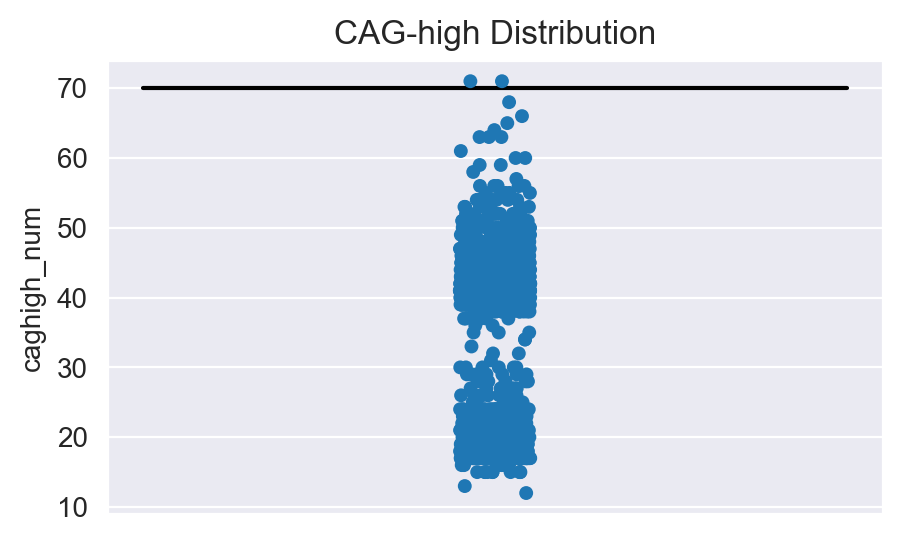

In [13]:
ch, cl = first6_vis['caghigh_num'].value_counts().sort_index(), first6_vis['caglow_num'].value_counts().sort_index()
display(cl, ch)

fig, ax1 = plt.subplots(figsize=[5, 3], dpi=200)
sns.stripplot(y=first6_vis['caghigh_num'], ax=ax1)
proj.plot_line(x=[-1, 1], y=[70, 70], color='black', axis=ax1)
plt.setp(ax1, title='CAG-high Distribution', )

In [14]:
cols = ['subjid', 'caglow_num', 'caghigh_num']
first6_vis[cols].apply(lambda row: 1 if (row[cols[1]] > 28) and (row[cols[-1]] > 70) else 0,
                      axis=1).sum()

0

#### TIME TAKEN PER PARTICIPANT FOR FIRST 6 VISITS

In [15]:
cols = ['subjid', 'seq', 'visdy']
display(main_df[cols])
vis6_yr = (main_df[cols[0::2]].groupby(cols[0]).sum()/5/365.167).round(1).reset_index().rename(columns={'visdy':'vis6_yr'})
overall_avg_time = vis6_yr['vis6_yr'].mean().round(1), vis6_yr['vis6_yr'].std().round(1)
display(overall_avg_time, vis6_yr)

,subjid,seq,visdy
0,R000024542,1,0
1,R000024542,2,371
2,R000024542,3,734
3,R000024542,4,1098
4,R000024542,5,1469
...,...,...,...
67091,R999989129,1,0
67092,R999993234,1,0
67093,R999993234,2,380
67094,R999993234,3,777


(1.1, 1.2)

,subjid,vis6_yr
0,R000024542,3.1
1,R00010372X,3.0
2,R000147438,0.0
3,R00021725X,4.0
4,R00023946X,1.9
...,...,...
21111,R999841810,0.7
21112,R999891140,0.0
21113,R99990772X,3.1
21114,R999989129,0.0


### BMI & BMI_diff

In [16]:
display(len(control),
        len(manifest),
        len(control) + len(manifest))

294

1254

1548

### AVERAGE

In [17]:
cols = [c for c in control.columns if 'bmi_vis' in c.lower()]# or 'bmi_diff_vis' in c.lower()]

col_rename = {0:'control_avg', 'index':'variable'}
ctrl_avg_bmi = control[cols].mean().round(1).reset_index().rename(columns=col_rename)
col_rename = {0:'control_std', 'index':'variable'}
ctrl_std_bmi = control[cols].std().round(1).reset_index().rename(columns=col_rename)
ctrl_avg = pd.merge(ctrl_avg_bmi, ctrl_std_bmi, on=['variable'])
ctrl_avg.loc[:, 'visit'] = np.arange(1, len(ctrl_avg)+1).astype(str)
ctrl_avg = ctrl_avg.drop('variable', axis=1)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg_bmi = manifest[cols].mean().round(1).reset_index().rename(columns=col_rename)
col_rename = {0:'manifest_std', 'index':'variable'}
mnf_std_bmi = manifest[cols].std().round(1).reset_index().rename(columns=col_rename)
mnf_avg = pd.merge(mnf_avg_bmi, mnf_std_bmi, on=['variable'])
mnf_avg.loc[:, 'visit'] = np.arange(1, len(mnf_avg)+1).astype(str)
mnf_avg = mnf_avg.drop('variable', axis=1)

display(ctrl_avg, mnf_avg)

avg_bmi = proj.replace_value_with(pd.merge(ctrl_avg, mnf_avg, on=['visit']), 
                                  replacement_guide={-999:0})
display(avg_bmi)

,control_avg,control_std,visit
0,28.1,7.1,1
1,28.2,7.0,2
2,28.5,7.0,3
3,28.5,7.1,4
4,28.6,7.2,5
5,28.6,6.9,6


,manifest_avg,manifest_std,visit
0,25.3,5.1,1
1,25.4,5.1,2
2,25.3,5.3,3
3,25.2,5.2,4
4,25.1,5.2,5
5,25.0,5.1,6


,control_avg,control_std,visit,manifest_avg,manifest_std
0,28.1,7.1,1,25.3,5.1
1,28.2,7.0,2,25.4,5.1
2,28.5,7.0,3,25.3,5.3
3,28.5,7.1,4,25.2,5.2
4,28.6,7.2,5,25.1,5.2
5,28.6,6.9,6,25.0,5.1


,visit,control_avg,manifest_avg
0,1,28.1,25.3
1,2,28.2,25.4
2,3,28.5,25.3
3,4,28.5,25.2
4,5,28.6,25.1
5,6,28.6,25.0


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1465: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1465: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<ErrorbarContainer object of 3 artists>

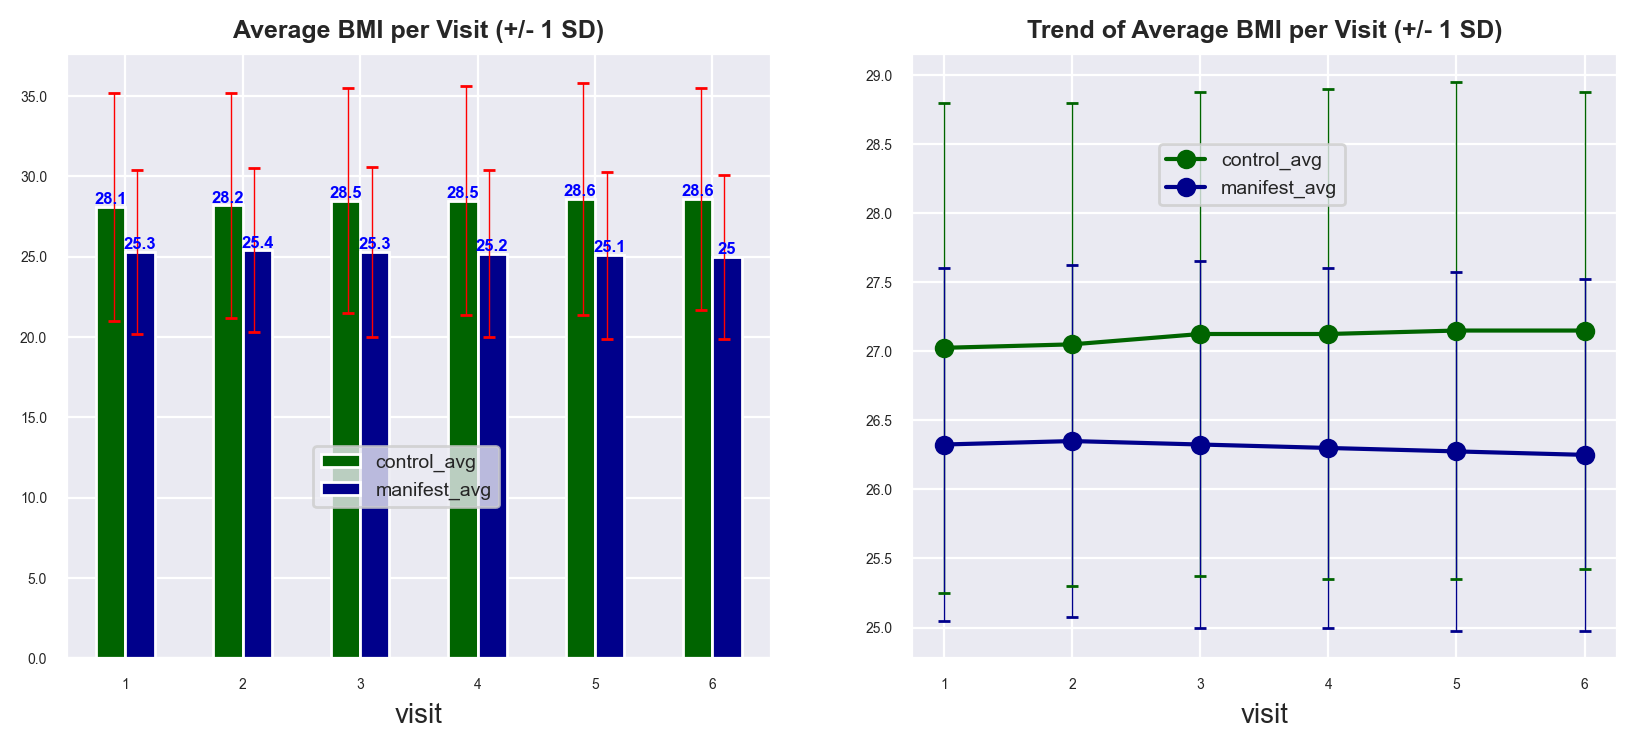

In [18]:
cols = ['visit', 'control_avg', 'manifest_avg']
cmap = {c:'darkgreen' if 'control' in c.lower() else 'darkblue' if 'manifest' in c.lower() else 'gray' for c in cols}
display(avg_bmi[cols])
# ax1 = proj.plot_column(ctrl_avg['visit'], ctrl_avg['control_avg'], color='green')
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)

trans1 = Affine2D().translate(-0.1, 0.0) + l.transData
trans2 = Affine2D().translate(+0.1, 0.0) + l.transData

avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=l)
proj.adjust_axis(l, plot_title="Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, 
                 show_legend_at=[0.35, 0.25],)
l.errorbar(ctrl_avg['visit'], ctrl_avg['control_avg'], yerr=avg_bmi['control_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
l.errorbar(mnf_avg['visit'], mnf_avg['manifest_avg'], yerr=avg_bmi['manifest_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

avg_bmi[cols].plot(kind='line', x='visit', marker='o', color=cmap, ax=r)
proj.adjust_axis(r, plot_title="Trend of Average BMI per Visit (+/- 1 SD)", title_size=9,
                 show_legend_at=[0.35, 0.75],)
r.errorbar(ctrl_avg['visit'], ctrl_avg['control_avg'], yerr=avg_bmi['control_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='darkgreen', )#transform=trans1)
r.errorbar(mnf_avg['visit'], mnf_avg['manifest_avg'], yerr=avg_bmi['manifest_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='darkblue', )#transform=trans2)

,seq,hd_status0,bmi
0,1,manifest,19.8
1,2,manifest,19.6
2,3,manifest,19.1
3,4,manifest,18.6
4,5,manifest,18.3
...,...,...,...
67087,3,manifest,25.5
67088,4,manifest,25.0
67089,5,manifest,24.5
67090,6,manifest,25.1


[Text(0.5, 0, 'visit'),
 Text(0, 0.5, 'average BMI'),
 Text(0.5, 1.0, 'Average BMI'),
 Text(0.5, 0, 'visit'),
 Text(0, 0.5, 'average BMI'),
 Text(0.5, 1.0, 'Average BMI')]

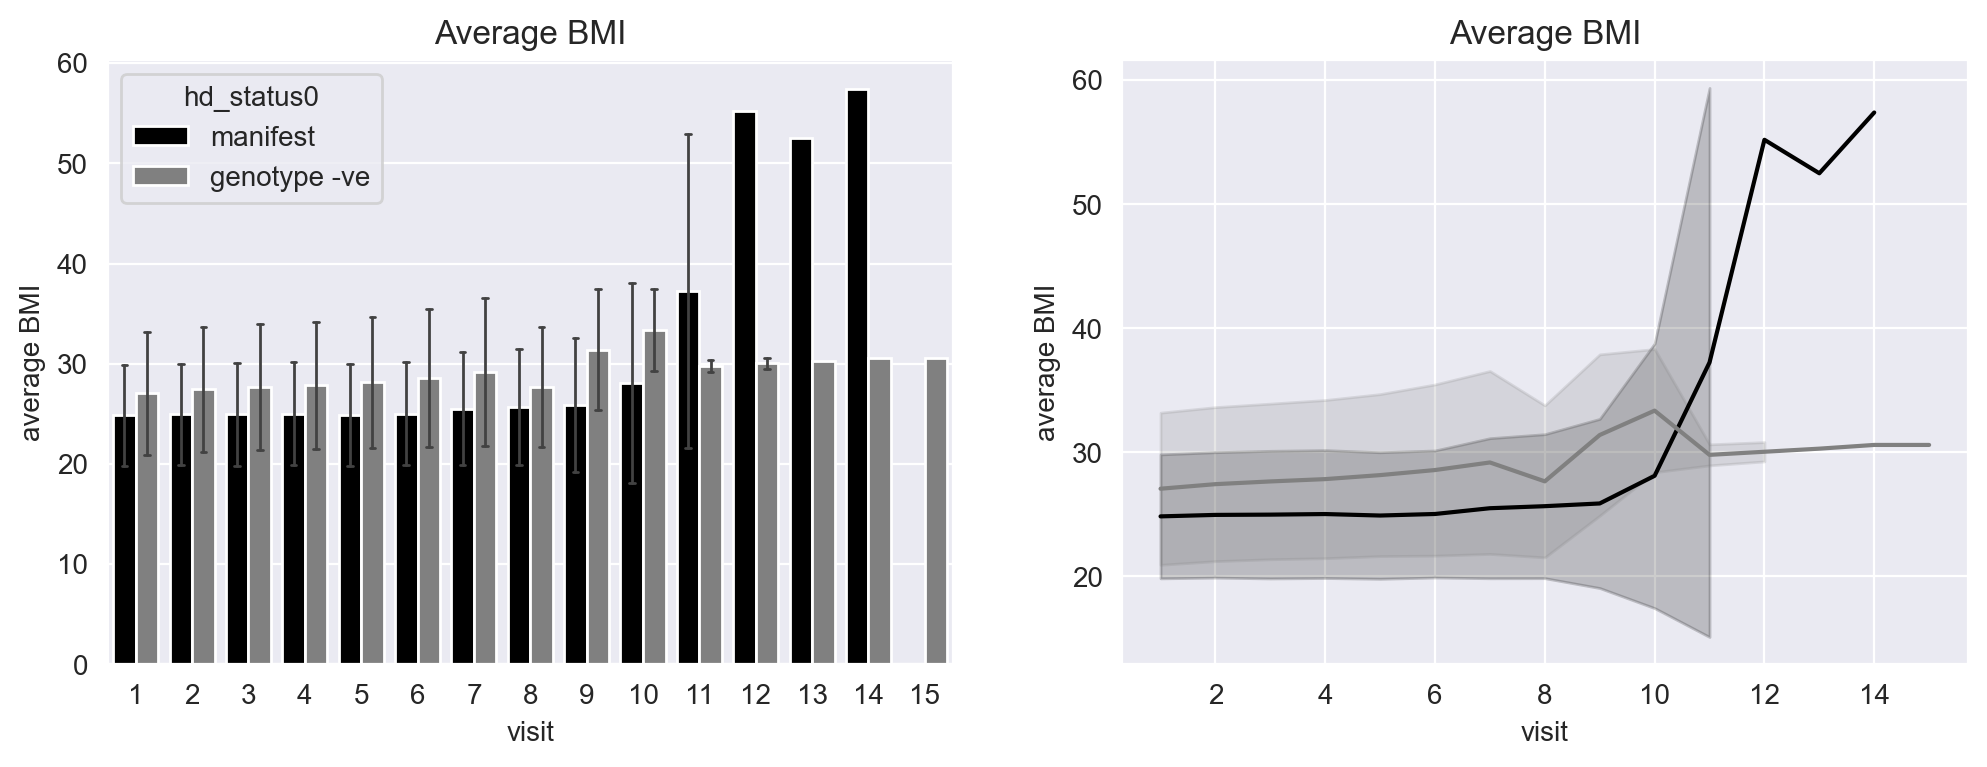

In [19]:
cols = ['seq', 'hd_status0', 'bmi']
cond = (main_df['hd_status0'].isin(['genotype -ve', 'manifest']))
df = main_df.loc[cond, cols]
display(df)

fig, (l, r) = plt.subplots(1, 2)
sns.barplot(data=df, x='seq', y='bmi', hue='hd_status0', palette=proj.hd_status_cmap, 
            ci='sd', capsize=0.1, errwidth=1, ax=l)
sns.lineplot(data=df, x='seq', y='bmi', hue='hd_status0', palette=proj.hd_status_cmap, 
             ci='sd', legend=False, ax=r)
plt.setp(fig, size_inches=[12, 4], dpi=200)
plt.setp([l, r], xlabel='visit', ylabel='average BMI', title='Average BMI')

In [20]:
# avg_bm = avg_bmi.loc[avg_bmi['variable'].str.lower().str.contains('bmi_vis')]
# display(avg_bm)
# color_map = {col:'green' if 'control' in col else 'darkblue' for col in avg_bmi.columns}
# display(color_map)
# fig, ax1 = plt.subplots(figsize=[8, 4], dpi=200)

# avg_bmdiff = avg_bmi.loc[avg_bmi['variable'].str.lower().str.contains('bmi_diff')]
# display(avg_bmdiff)
# color_map = {col:'green' if 'control' in col else 'darkblue' for col in avg_bmdiff.columns}
# display(color_map)
# proj.adjust_axis(avg_bmdiff.plot(kind='bar', x='variable', color=color_map, ax=ax1), 
#                  plot_title='Average BMI Diff per Visit', title_size=10,
#                  annotate=True, annot_size=5, show_legend_at=[0.5, 0.6])

,visit,control_avg,manifest_avg
0,1,28.1,25.3
1,2,28.2,25.4
2,3,28.5,25.3
3,4,28.5,25.2
4,5,28.6,25.1
5,6,28.6,25.0


,visit,control_avg,manifest_avg
visit,1.00,0.93,-0.91
control_avg,0.93,1.00,-0.77
manifest_avg,-0.91,-0.77,1.00


<AxesSubplot:title={'center':'Relationship Between Time (Sequential Visits) & Average BMI'}>

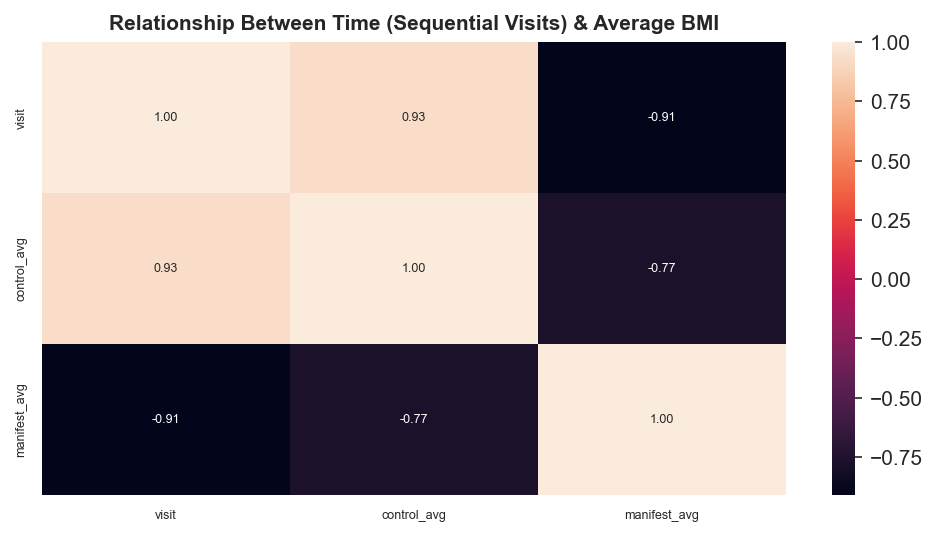

In [21]:
# check for relationship
cols = ['visit', 'control_avg', 'manifest_avg']
rlshp = pd.DataFrame(avg_bmi[cols])
rlshp.loc[:, 'visit'] = np.arange(1, 7)
display(rlshp, rlshp.corr())
proj.plot_correl_heatmap(rlshp, plot_title='Relationship Between Time (Sequential Visits) & Average BMI')

In [22]:
cols = ['control_avg', 'manifest_avg']
scaler = s_prep.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(rlshp[cols]), columns=cols)
y = rlshp['visit']
display(X, y)
corrn = proj.corr_with_pearson(X, y, True)
display(corrn)

,control_avg,manifest_avg
0,0.0,0.75
1,0.2,1.00
2,0.8,0.75
3,0.8,0.50
4,1.0,0.25
5,1.0,0.00


0    1
1    2
2    3
3    4
4    5
5    6
Name: visit, dtype: int32

control_avg     92.55
manifest_avg   -90.78
dtype: float64

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1621: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1800: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks())


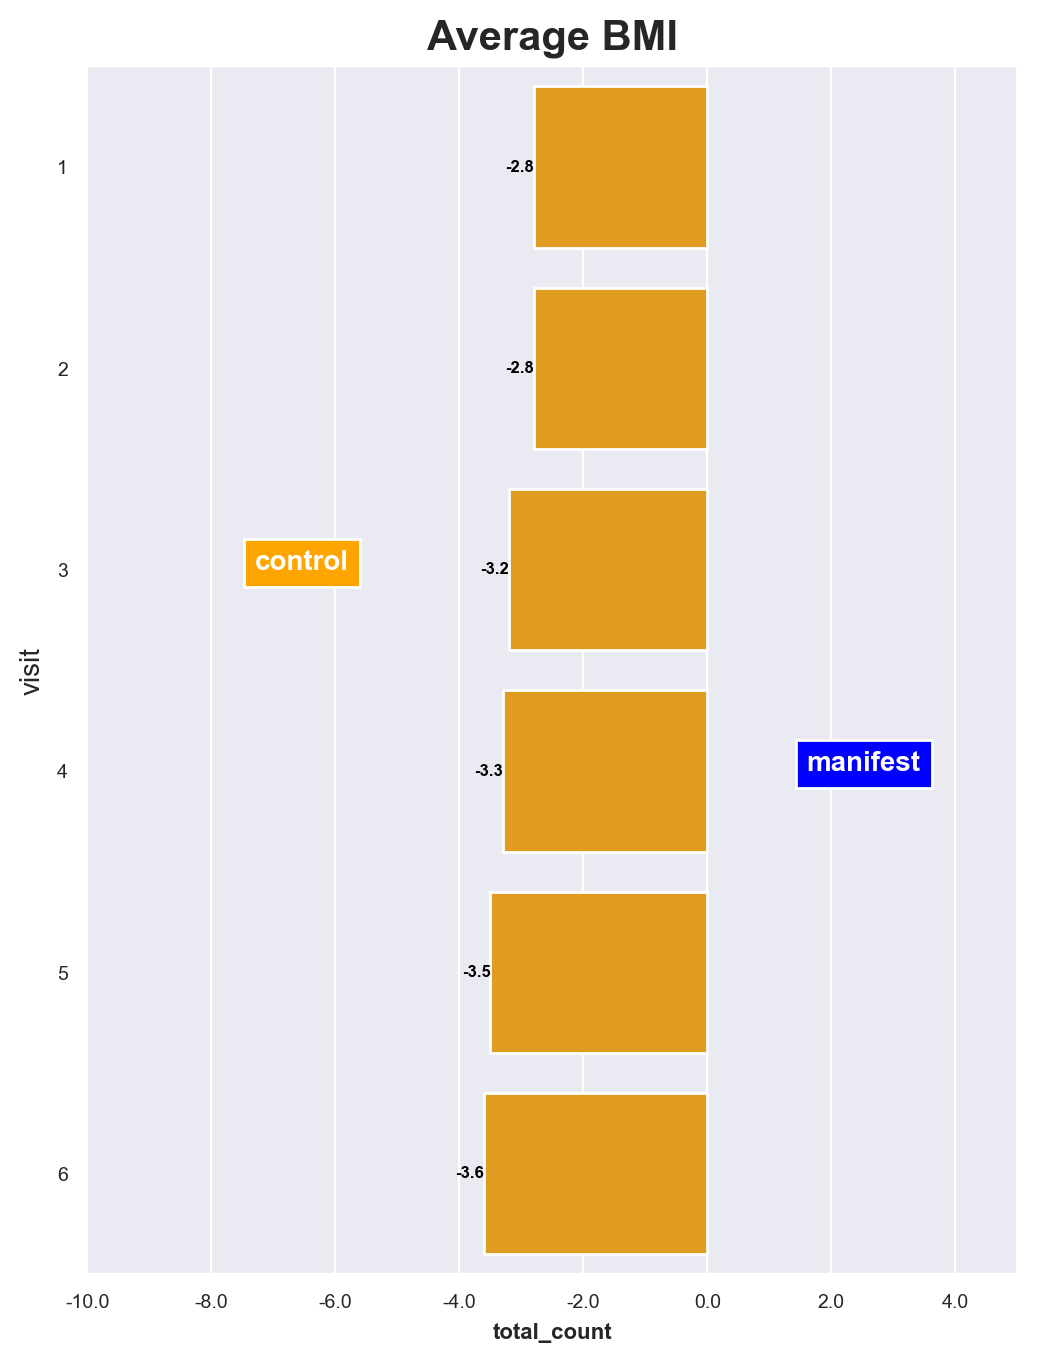



HYPOTHESIS TEST FOR:
control average BMI > manifest average BMI

ORIGINAL SAMPLE SIZE: 
control average BMI: 6
manifest average BMI: 6


control average BMI:
 Total = 170.5
 Average = 28.4167
 Standard deviation = 0.2137

manifest average BMI:
 Total = 151.3
 Average = 25.2167
 Standard deviation = 0.1472

MEAN DIFFERENCE = 3.2
POOLED STD = 0.2595


HYPOTHESIS TEST:
Is 28.4167 significantly HIGHER THAN 25.2167?
BASED ON the chosen level of significance
Is the difference 3.2 > 0?

At 99% confidence, REJECT the null hypothesis!
 3.2 is greater than 0.7785



In [23]:
proj.plot_diff(left_side=avg_bmi['control_avg'], right_side=avg_bmi['manifest_avg'], 
               common_catgs=avg_bmi['visit'], precision=1, left_legend='control', right_legend='manifest',
              plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
               lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

proj.report_a_significance(X1_set=avg_bmi['control_avg'], X2_set=avg_bmi['manifest_avg'],
                           X1_name='control average BMI', X2_name='manifest average BMI')

#### Gender Effect

In [24]:
# male participants
cols = [c for c in control.columns if 'bmi_vis' in c.lower()]
col_rename = {0:'control_avg', 'index':'variable'}
ctrl_avg_bmi = male_control[cols].mean().round(1).reset_index().rename(columns=col_rename)
col_rename = {0:'control_std', 'index':'variable'}
ctrl_std_bmi = male_control[cols].std().round(1).reset_index().rename(columns=col_rename)
ctrl_avg = pd.merge(ctrl_avg_bmi, ctrl_std_bmi, on=['variable'])
ctrl_avg.loc[:, 'visit'] = np.arange(1, len(ctrl_avg)+1).astype(str)
ctrl_avg = ctrl_avg.drop('variable', axis=1)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg_bmi = male_manifest[cols].mean().round(1).reset_index().rename(columns=col_rename)
col_rename = {0:'manifest_std', 'index':'variable'}
mnf_std_bmi = male_manifest[cols].std().round(1).reset_index().rename(columns=col_rename)
mnf_avg = pd.merge(mnf_avg_bmi, mnf_std_bmi, on=['variable'])
mnf_avg.loc[:, 'visit'] = np.arange(1, len(mnf_avg)+1).astype(str)
mnf_avg = mnf_avg.drop('variable', axis=1)

display(ctrl_avg, mnf_avg)

male_avg_bmi = proj.replace_value_with(pd.merge(ctrl_avg, mnf_avg, on='visit'),
                                       {-999:0})
display(male_avg_bmi)

,control_avg,control_std,visit
0,27.6,4.7,1
1,28.0,5.1,2
2,28.4,5.2,3
3,28.1,5.0,4
4,28.3,5.1,5
5,28.3,5.3,6


,manifest_avg,manifest_std,visit
0,25.7,4.2,1
1,25.7,4.3,2
2,25.6,4.5,3
3,25.4,4.4,4
4,25.3,4.4,5
5,25.2,4.4,6


,control_avg,control_std,visit,manifest_avg,manifest_std
0,27.6,4.7,1,25.7,4.2
1,28.0,5.1,2,25.7,4.3
2,28.4,5.2,3,25.6,4.5
3,28.1,5.0,4,25.4,4.4
4,28.3,5.1,5,25.3,4.4
5,28.3,5.3,6,25.2,4.4


,visit,control_avg,manifest_avg
0,1,27.6,25.7
1,2,28.0,25.7
2,3,28.4,25.6
3,4,28.1,25.4
4,5,28.3,25.3
5,6,28.3,25.2


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1465: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1465: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<ErrorbarContainer object of 3 artists>

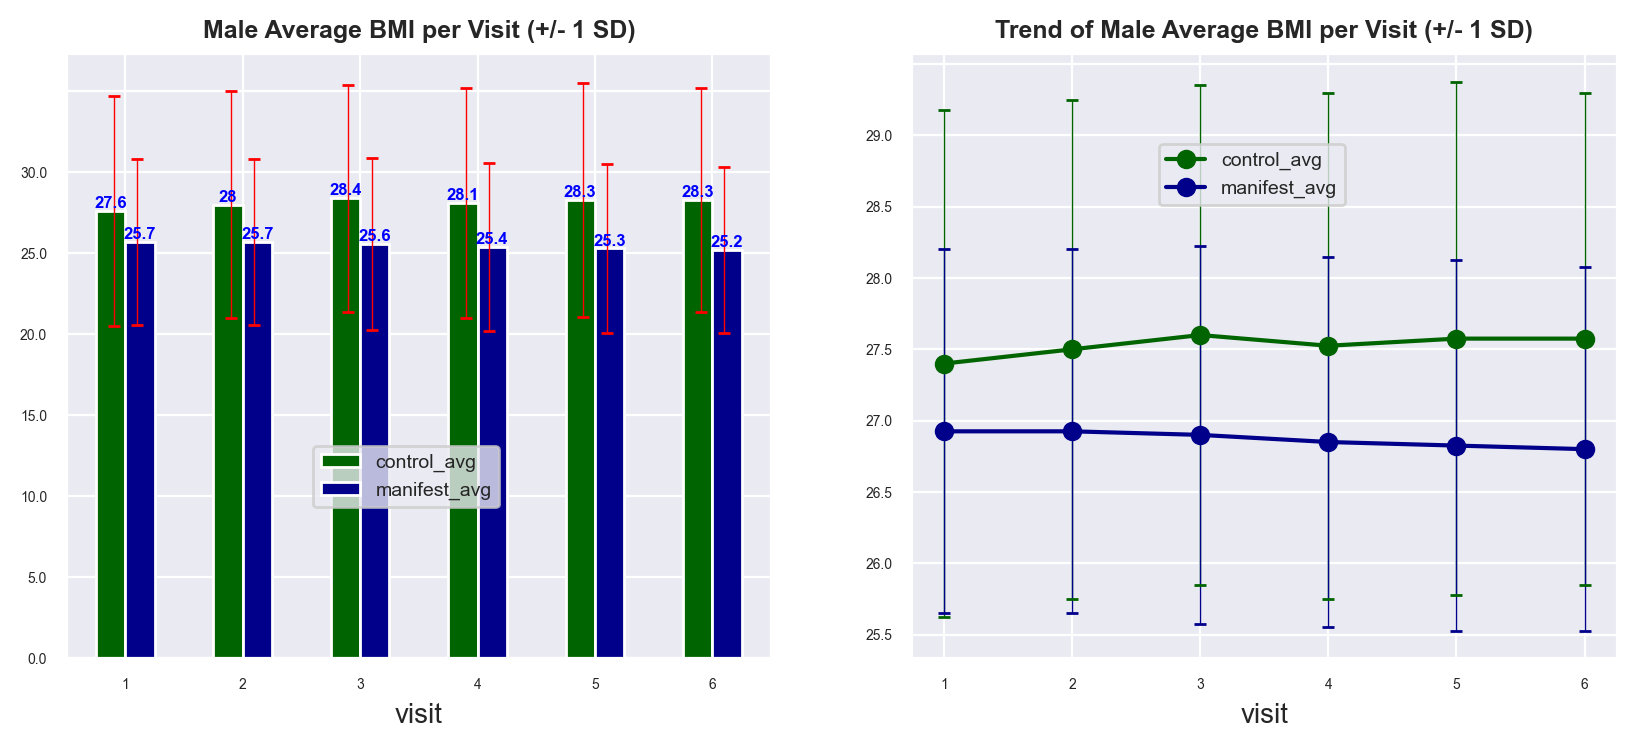

In [25]:
cols = ['visit', 'control_avg', 'manifest_avg']
cmap = {c:'darkgreen' if 'control' in c.lower() else 'darkblue' if 'manifest' in c.lower() else 'gray' for c in cols}
display(male_avg_bmi[cols])
# ax1 = proj.plot_column(ctrl_avg['visit'], ctrl_avg['control_avg'], color='green')
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)

trans1 = Affine2D().translate(-0.1, 0.0) + l.transData
trans2 = Affine2D().translate(+0.1, 0.0) + l.transData

male_avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=l)
proj.adjust_axis(l, plot_title="Male Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
l.errorbar(ctrl_avg['visit'], ctrl_avg['control_avg'], yerr=avg_bmi['control_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
l.errorbar(mnf_avg['visit'], mnf_avg['manifest_avg'], yerr=avg_bmi['manifest_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

male_avg_bmi[cols].plot(kind='line', x='visit', marker='o', color=cmap, ax=r)
proj.adjust_axis(r, plot_title="Trend of Male Average BMI per Visit (+/- 1 SD)", title_size=9,
                 show_legend_at=[0.35, 0.75],)
r.errorbar(ctrl_avg['visit'], ctrl_avg['control_avg'], yerr=avg_bmi['control_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='darkgreen', )
r.errorbar(mnf_avg['visit'], mnf_avg['manifest_avg'], yerr=avg_bmi['manifest_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='darkblue', )

In [26]:
# avg_bmdiff = male_avg_bmi.loc[male_avg_bmi['variable'].str.lower().str.contains('bmi_diff')]
# display(avg_bmdiff)
# color_map = {col:'green' if 'control' in col else 'darkblue' for col in avg_bmdiff.columns}
# display(color_map)

# fig, ax1 = plt.subplots(figsize=[8, 4], dpi=200)
# proj.adjust_axis(avg_bmdiff.plot(kind='bar', x='variable', color=color_map, ax=ax1), 
#                  plot_title='Male Average BMI Diff per Visit', title_size=10,
#                  annotate=True, annot_size=5)

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1621: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1800: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks())


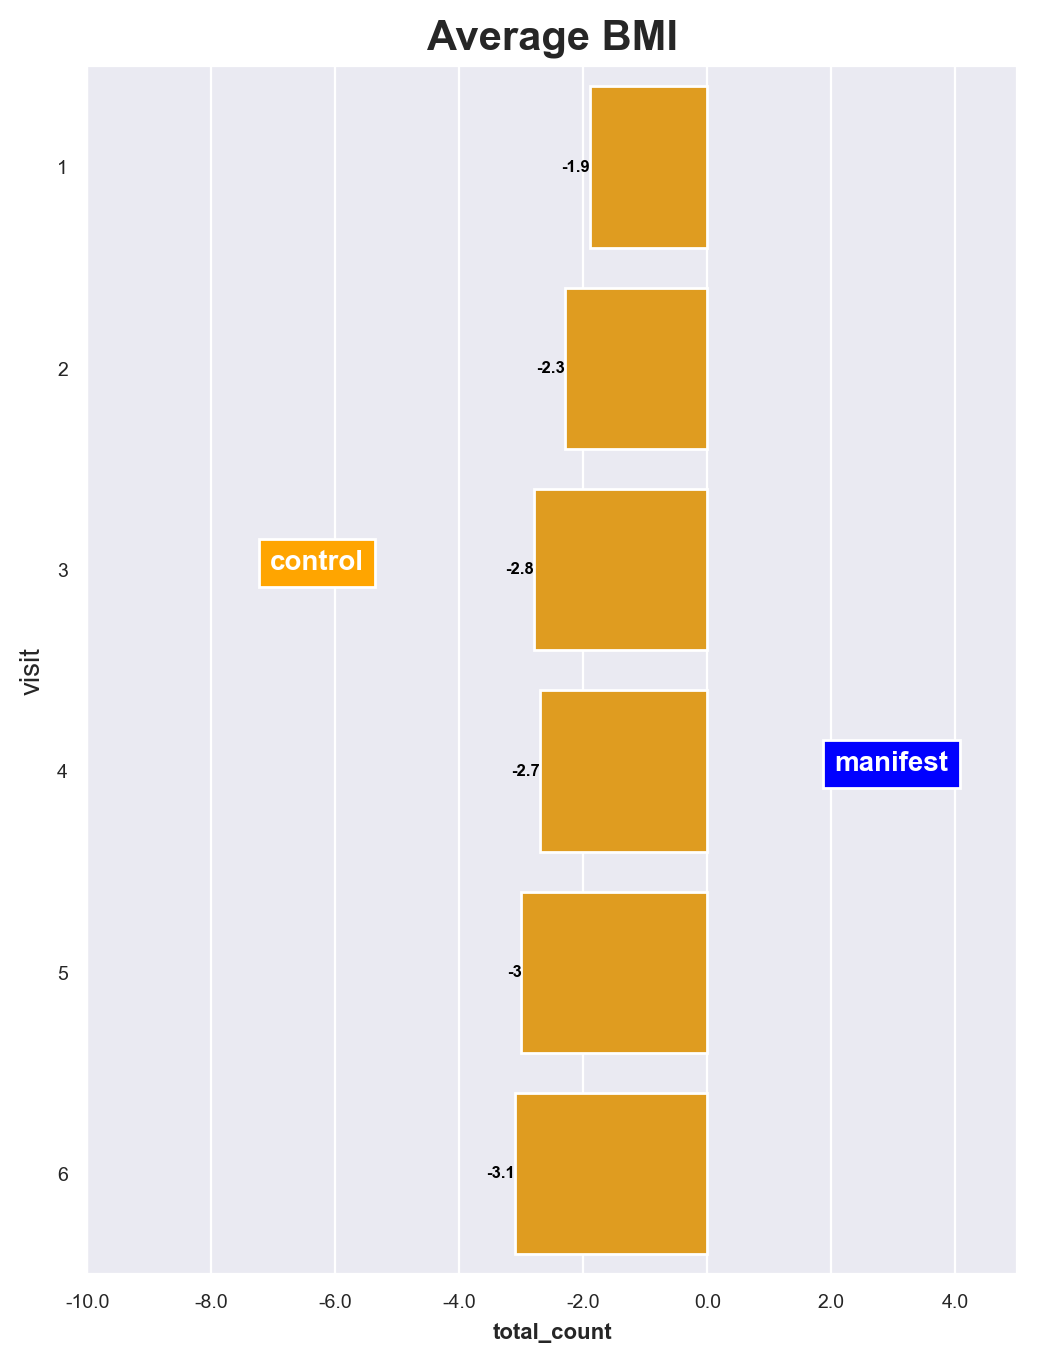



HYPOTHESIS TEST FOR:
control average BMI > manifest average BMI

ORIGINAL SAMPLE SIZE: 
control average BMI: 6
manifest average BMI: 6


control average BMI:
 Total = 168.70000000000002
 Average = 28.1167
 Standard deviation = 0.2927

manifest average BMI:
 Total = 152.9
 Average = 25.4833
 Standard deviation = 0.2137

MEAN DIFFERENCE = 2.6334
POOLED STD = 0.3624


HYPOTHESIS TEST:
Is 28.1167 significantly HIGHER THAN 25.4833?
BASED ON the chosen level of significance
Is the difference 2.6334 > 0?

At 99% confidence, REJECT the null hypothesis!
 2.6334 is greater than 1.0872



In [27]:
proj.plot_diff(left_side=male_avg_bmi['control_avg'], right_side=male_avg_bmi['manifest_avg'], 
               common_catgs=male_avg_bmi['visit'], precision=1, left_legend='control', right_legend='manifest',
              plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
               lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

proj.report_a_significance(X1_set=male_avg_bmi['control_avg'], X2_set=male_avg_bmi['manifest_avg'],
                           X1_name='control average BMI', X2_name='manifest average BMI')

,visit,control_avg,manifest_avg
0,1,27.6,25.7
1,2,28.0,25.7
2,3,28.4,25.6
3,4,28.1,25.4
4,5,28.3,25.3
5,6,28.3,25.2


,visit,control_avg,manifest_avg
visit,1.00,0.75,-0.98
control_avg,0.75,1.00,-0.60
manifest_avg,-0.98,-0.60,1.00


<AxesSubplot:title={'center':'Relationship Between Time (Sequential Visits) & Average BMI of Male Participants'}>

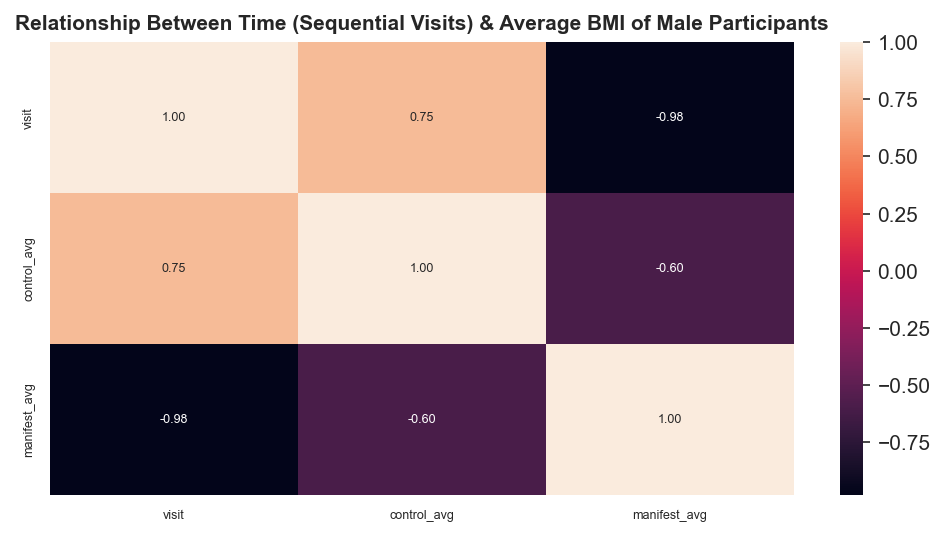

In [28]:
# check for relationship
rlshp = pd.DataFrame(male_avg_bmi[cols])
rlshp.loc[:, 'visit'] = np.arange(1, 7)
display(rlshp, rlshp.corr())
proj.plot_correl_heatmap(rlshp, plot_title='Relationship Between Time (Sequential Visits) & Average BMI of Male Participants')

In [29]:
# female participants
cols = [c for c in control.columns if 'bmi_vis' in c.lower()]
display(female_control[cols])
col_rename = {0:'control_avg', 'index':'variable'}
ctrl_avg_bmi = female_control[cols].mean().round(1).reset_index().rename(columns=col_rename)
col_rename = {0:'control_std', 'index':'variable'}
ctrl_std_bmi = female_control[cols].std().round(1).reset_index().rename(columns=col_rename)
ctrl_avg = pd.merge(ctrl_avg_bmi, ctrl_std_bmi, on=['variable'])
ctrl_avg.loc[:, 'visit'] = np.arange(1, len(ctrl_avg)+1).astype(str)
ctrl_avg = ctrl_avg.drop('variable', axis=1)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg_bmi = female_manifest[cols].mean().round(1).reset_index().rename(columns=col_rename)
col_rename = {0:'manifest_std', 'index':'variable'}
mnf_std_bmi = female_manifest[cols].std().round(1).reset_index().rename(columns=col_rename)
mnf_avg = pd.merge(mnf_avg_bmi, mnf_std_bmi, on=['variable'])
mnf_avg.loc[:, 'visit'] = np.arange(1, len(mnf_avg)+1).astype(str)
mnf_avg = mnf_avg.drop('variable', axis=1)

display(ctrl_avg, mnf_avg)

female_avg_bmi = proj.replace_value_with(pd.merge(ctrl_avg, mnf_avg, on='visit'),
                                       {-999:0})
display(female_avg_bmi)

,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6
11,20.2,20.6,21.4,22.6,21.4,21.9
37,25.5,25.7,25.0,23.7,25.0,25.0
44,35.6,36.4,34.4,27.7,37.7,34.6
54,32.5,30.3,30.9,29.9,30.9,30.9
62,42.3,19.3,19.4,19.6,20.1,18.4
...,...,...,...,...,...,...
2357,31.1,31.8,32.1,31.7,29.6,29.1
2372,52.5,52.1,51.9,53.2,55.7,57.4
2384,21.0,20.2,20.9,21.2,21.6,21.0
2411,25.4,25.4,26.7,27.3,26.7,27.2


,control_avg,control_std,visit
0,28.3,7.8,1
1,28.3,7.6,2
2,28.5,7.6,3
3,28.7,7.8,4
4,28.8,7.9,5
5,28.7,7.5,6


,manifest_avg,manifest_std,visit
0,25.0,5.9,1
1,25.1,5.9,2
2,25.1,6.0,3
3,25.0,5.9,4
4,24.9,5.9,5
5,24.9,5.7,6


,control_avg,control_std,visit,manifest_avg,manifest_std
0,28.3,7.8,1,25.0,5.9
1,28.3,7.6,2,25.1,5.9
2,28.5,7.6,3,25.1,6.0
3,28.7,7.8,4,25.0,5.9
4,28.8,7.9,5,24.9,5.9
5,28.7,7.5,6,24.9,5.7


,visit,control_avg,manifest_avg
0,1,28.3,25.0
1,2,28.3,25.1
2,3,28.5,25.1
3,4,28.7,25.0
4,5,28.8,24.9
5,6,28.7,24.9


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1465: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1465: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<ErrorbarContainer object of 3 artists>

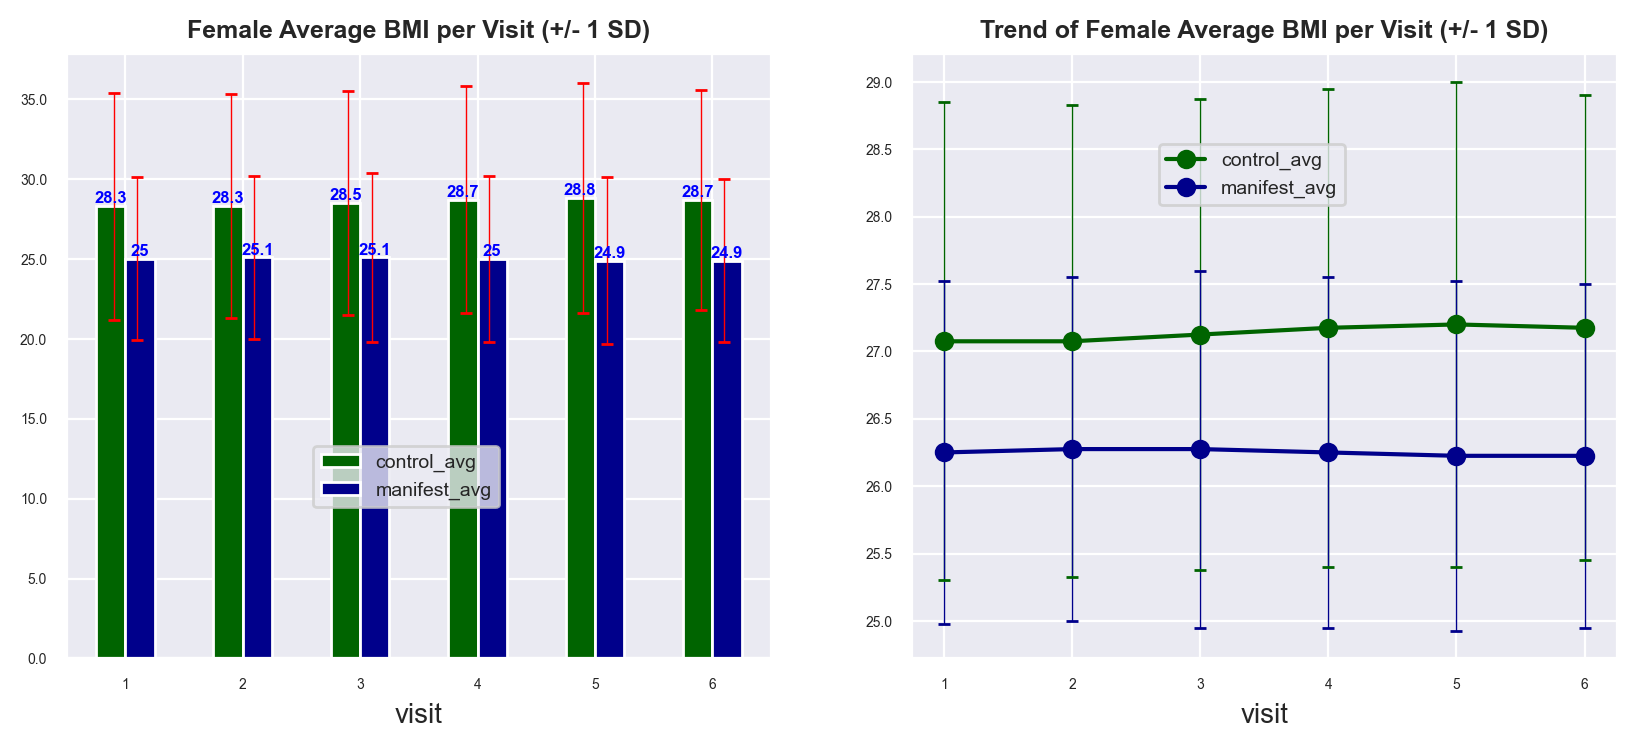

In [30]:
cols = ['visit', 'control_avg', 'manifest_avg']
cmap = {c:'darkgreen' if 'control' in c.lower() else 'darkblue' if 'manifest' in c.lower() else 'gray' for c in cols}
display(female_avg_bmi[cols])
# ax1 = proj.plot_column(ctrl_avg['visit'], ctrl_avg['control_avg'], color='green')
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)

trans1 = Affine2D().translate(-0.1, 0.0) + l.transData
trans2 = Affine2D().translate(+0.1, 0.0) + l.transData

female_avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=l)
proj.adjust_axis(l, plot_title="Female Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
l.errorbar(ctrl_avg['visit'], ctrl_avg['control_avg'], yerr=avg_bmi['control_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
l.errorbar(mnf_avg['visit'], mnf_avg['manifest_avg'], yerr=avg_bmi['manifest_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

female_avg_bmi[cols].plot(kind='line', x='visit', marker='o', color=cmap, ax=r)
proj.adjust_axis(r, plot_title="Trend of Female Average BMI per Visit (+/- 1 SD)", title_size=9,
                 show_legend_at=[0.35, 0.75],)
r.errorbar(ctrl_avg['visit'], ctrl_avg['control_avg'], yerr=avg_bmi['control_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='darkgreen', )#transform=trans1)
r.errorbar(mnf_avg['visit'], mnf_avg['manifest_avg'], yerr=avg_bmi['manifest_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='darkblue', )#transform=trans2)

In [31]:
# avg_bmdiff = female_avg_bmi.loc[female_avg_bmi['variable'].str.lower().str.contains('bmi_diff')]
# display(avg_bmdiff)
# color_map = {col:'green' if 'control' in col else 'darkblue' for col in avg_bmdiff.columns}
# display(color_map)

# fig, ax1 = plt.subplots(figsize=[8, 4], dpi=200)
# proj.adjust_axis(avg_bmdiff.plot(kind='bar', x='variable', color=color_map, ax=ax1), 
#                  plot_title='female Average BMI Diff per Visit', title_size=10,
#                  annotate=True, annot_size=5)

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1621: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1800: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks())


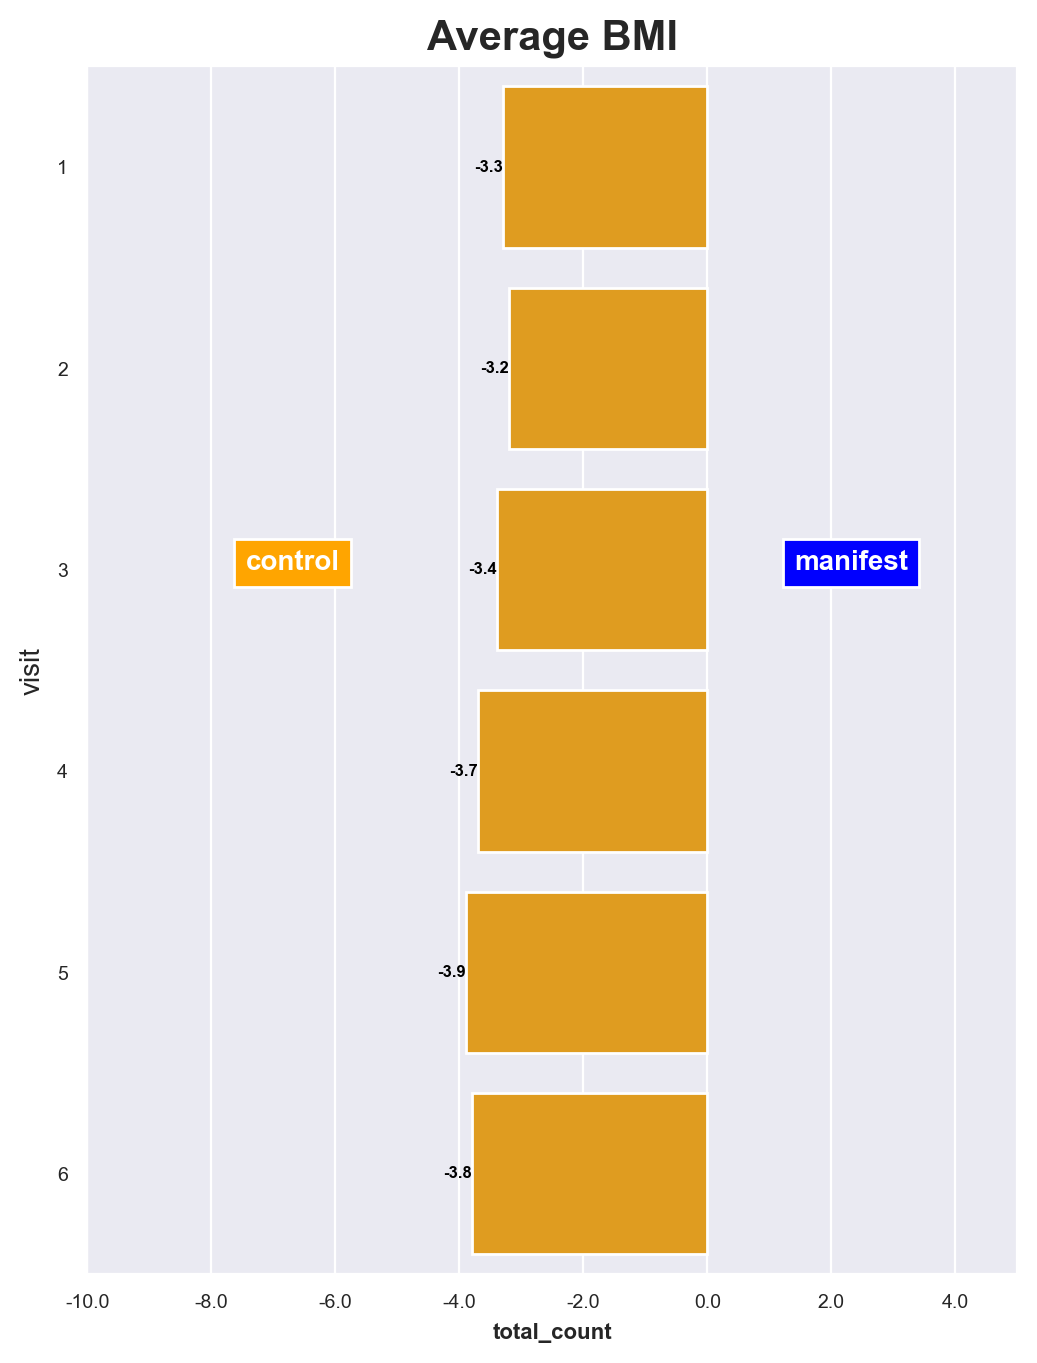



HYPOTHESIS TEST FOR:
control average BMI > manifest average BMI

ORIGINAL SAMPLE SIZE: 
control average BMI: 6
manifest average BMI: 6


control average BMI:
 Total = 171.29999999999998
 Average = 28.55
 Standard deviation = 0.2168

manifest average BMI:
 Total = 150.0
 Average = 25.0
 Standard deviation = 0.0894

MEAN DIFFERENCE = 3.55
POOLED STD = 0.2345


HYPOTHESIS TEST:
Is 28.55 significantly HIGHER THAN 25.0?
BASED ON the chosen level of significance
Is the difference 3.55 > 0?

At 99% confidence, REJECT the null hypothesis!
 3.55 is greater than 0.7035



In [32]:
proj.plot_diff(left_side=female_avg_bmi['control_avg'], right_side=female_avg_bmi['manifest_avg'], 
               common_catgs=female_avg_bmi['visit'], precision=1, left_legend='control', right_legend='manifest',
              plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
               lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

proj.report_a_significance(X1_set=female_avg_bmi['control_avg'], X2_set=female_avg_bmi['manifest_avg'],
                           X1_name='control average BMI', X2_name='manifest average BMI')

,visit,control_avg,manifest_avg
0,1,28.3,25.0
1,2,28.3,25.1
2,3,28.5,25.1
3,4,28.7,25.0
4,5,28.8,24.9
5,6,28.7,24.9


,visit,control_avg,manifest_avg
visit,1.00,0.91,-0.72
control_avg,0.91,1.00,-0.72
manifest_avg,-0.72,-0.72,1.00


<AxesSubplot:title={'center':'Relationship Between Time (Sequential Visits) & Average BMI of Female Participants'}>

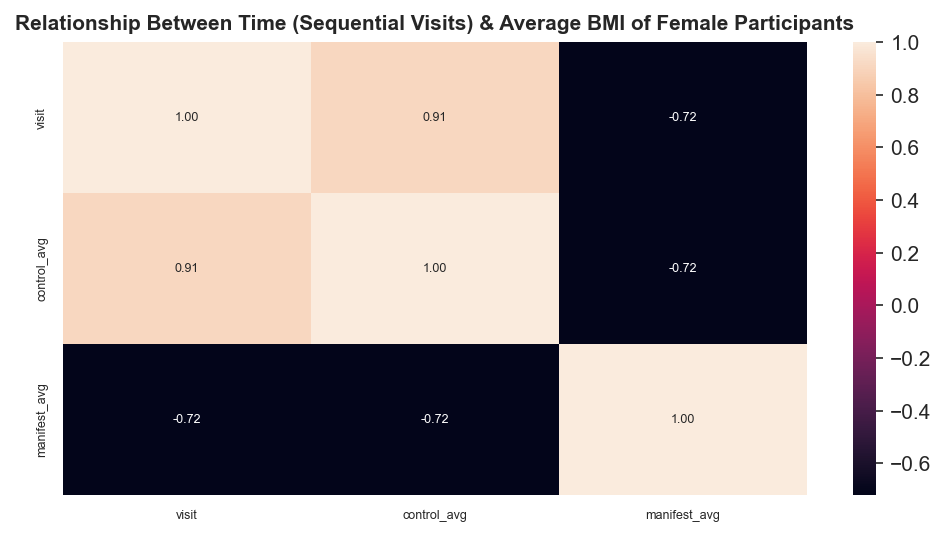

In [33]:
# check for relationship
rlshp = pd.DataFrame(female_avg_bmi[cols])
rlshp.loc[:, 'visit'] = np.arange(1, 7)
display(rlshp, rlshp.corr())
proj.plot_correl_heatmap(rlshp, plot_title='Relationship Between Time (Sequential Visits) & Average BMI of Female Participants')

In [34]:
stopt

NameError: name 'stopt' is not defined